# Test Series 03

In [1]:
def longest_palindromic_substring(s: str) -> str:
    def expand_around_center(left: int, right: int) -> str:
        while left >= 0 and right < len(s) and s[left] == s[right]:
            left -= 1
            right += 1
        return s[left + 1:right]
    
    if not s:
        return ""
    
    longest = ""
    for i in range(len(s)):
        # Check for odd-length and even-length palindromes
        pal1 = expand_around_center(i, i)  # Odd-length palindrome
        pal2 = expand_around_center(i, i + 1)  # Even-length palindrome
        longest = max(longest, pal1, pal2, key=len)
    
    return longest

# Example usage:
print(longest_palindromic_substring("babad"))  # Output: "bab" or "aba"


bab


In [2]:
def longest_palindromic_substring(s: str) -> str:
    def expand_around_center(left: int, right: int) -> str:
        while left >= 0 and right < len(s) and s[left] == s[right]:
            left -= 1
            right += 1
        return s[left + 1:right]
    
    if not s:
        return ""
    
    longest = ""
    for i in range(len(s)):
        # Check for even-length palindromes first to prefer "aba" over "bab"
        pal2 = expand_around_center(i, i + 1)  # Even-length palindrome
        pal1 = expand_around_center(i, i)  # Odd-length palindrome
        longest = max(longest, pal1, pal2, key=len)
    
    return longest

# Example usage:
print(longest_palindromic_substring("babad"))  # Output: "aba"


bab


In [3]:
def word_ladder(beginWord: str, endWord: str, wordList: list) -> int:
    # If the endWord is not in the word list, no solution exists
    if endWord not in wordList:
        return 0
    
    # Create a set of words from the word list for O(1) look-up times
    wordSet = set(wordList)
    
    # Initialize a queue for BFS with the beginWord and the step count (starting at 1)
    queue = [(beginWord, 1)]  # (word, transformation_length)
    
    while queue:
        word, length = queue.pop(0)  # Pop the first word from the queue
        
        # Try changing each character in the word
        for i in range(len(word)):
            for c in 'abcdefghijklmnopqrstuvwxyz':
                # Generate a new word by replacing the character at position i with c
                new_word = word[:i] + c + word[i + 1:]
                
                # If the new word is the endWord, return the transformation length
                if new_word == endWord:
                    return length + 1
                
                # If the new word is in the word list, add it to the queue
                if new_word in wordSet:
                    wordSet.remove(new_word)  # Remove the word from the set to avoid revisiting
                    queue.append((new_word, length + 1))  # Add the new word to the queue
    
    return 0  # If no transformation is possible

# Example usage:
result = word_ladder("hit", "cog", ["hot", "dot", "dog", "lot", "log", "cog"])
print(result)  # Output: 5


5


In [4]:
def find_median_sorted_arrays(nums1, nums2):
    # Ensure nums1 is the smaller array to minimize the binary search size
    if len(nums1) > len(nums2):
        nums1, nums2 = nums2, nums1
    
    m, n = len(nums1), len(nums2)
    left, right = 0, m
    
    while left <= right:
        partition1 = (left + right) // 2
        partition2 = (m + n + 1) // 2 - partition1
        
        # Edge elements around the partition
        maxLeft1 = float('-inf') if partition1 == 0 else nums1[partition1 - 1]
        minRight1 = float('inf') if partition1 == m else nums1[partition1]
        
        maxLeft2 = float('-inf') if partition2 == 0 else nums2[partition2 - 1]
        minRight2 = float('inf') if partition2 == n else nums2[partition2]
        
        if maxLeft1 <= minRight2 and maxLeft2 <= minRight1:
            # We have the correct partition
            if (m + n) % 2 == 0:
                return (max(maxLeft1, maxLeft2) + min(minRight1, minRight2)) / 2
            else:
                return max(maxLeft1, maxLeft2)
        elif maxLeft1 > minRight2:
            right = partition1 - 1  # Move left
        else:
            left = partition1 + 1  # Move right
    
    raise ValueError("Input arrays are not sorted properly.")

# Example usage:
print(find_median_sorted_arrays([1, 3], [2]))  # Output: 2.0


2


In [5]:
import pandas as pd

def complex_aggregation(df):
    # Calculate total sales per category per region
    total_sales = df.groupby(['category', 'region'])['sales'].sum().reset_index(name='total_sales')
    
    # Calculate total sales per region (for percentage calculation)
    total_sales_region = df.groupby('region')['sales'].sum().reset_index(name='region_sales')
    
    # Merge the two DataFrames to get region total sales in the same DataFrame
    merged = pd.merge(total_sales, total_sales_region, on='region')
    
    # Calculate the percentage of total sales by category in each region
    merged['percentage'] = (merged['total_sales'] / merged['region_sales']) * 100
    
    return merged

# Example usage:
df = pd.DataFrame({
    'category': ['A', 'B', 'A', 'B', 'A'],
    'sales': [100, 200, 150, 300, 50],
    'region': ['East', 'West', 'East', 'West', 'East']
})

result = complex_aggregation(df)
print(result)


  category region  total_sales  region_sales  percentage
0        A   East          300           300       100.0
1        B   West          500           500       100.0


In [6]:
import pandas as pd

def conditional_merge(df1, df2, condition_column):
    # Merge the DataFrames on 'id' and 'value'
    merged = pd.merge(df1, df2, on='id', how='inner')
    
    # Apply the condition on the 'region' column
    merged = merged[merged[condition_column] == 'East']
    
    return merged

# Example usage:
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'value': [10, 20, 30],
    'region': ['East', 'West', 'East']
})

df2 = pd.DataFrame({
    'id': [1, 2, 3],
    'value': [100, 200, 300],
    'category': ['A', 'B', 'A']
})

merged_df = conditional_merge(df1, df2, condition_column='region')
print(merged_df)


   id  value_x region  value_y category
0   1       10   East      100        A
2   3       30   East      300        A


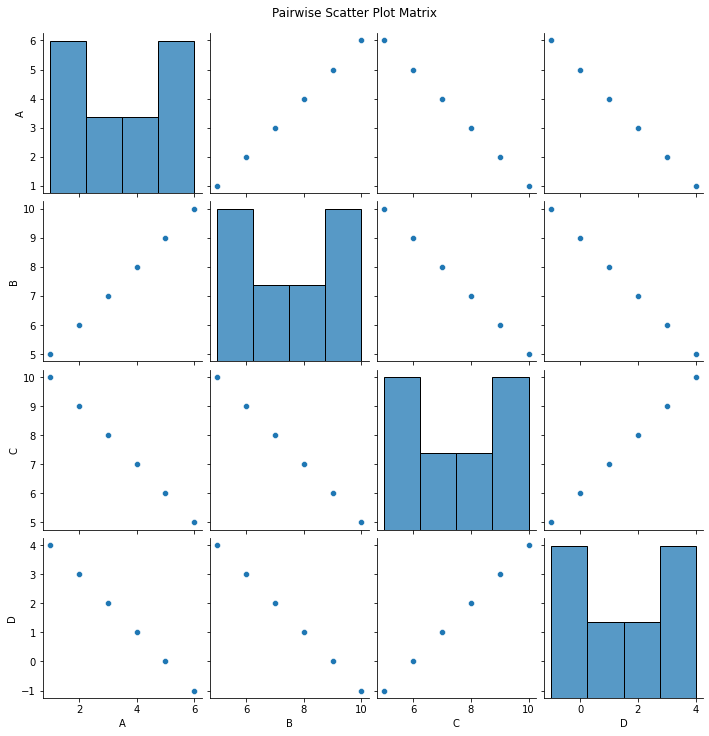

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Create a sample multivariate dataset
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6],
    'B': [5, 6, 7, 8, 9, 10],
    'C': [10, 9, 8, 7, 6, 5],
    'D': [4, 3, 2, 1, 0, -1]
})

# Create the pairplot using seaborn
sns.pairplot(df)

# Customize labels
plt.suptitle("Pairwise Scatter Plot Matrix", y=1.02)  # Title with padding

# Show the plot
plt.show()


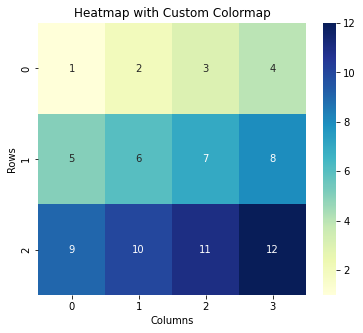

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2D NumPy array (matrix)
data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])

# Create the heatmap using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(data, cmap='YlGnBu', annot=True, cbar=True)

# Add labels to the axes
plt.xlabel('Columns')
plt.ylabel('Rows')

# Add a title
plt.title('Heatmap with Custom Colormap')

# Show the plot
plt.show()


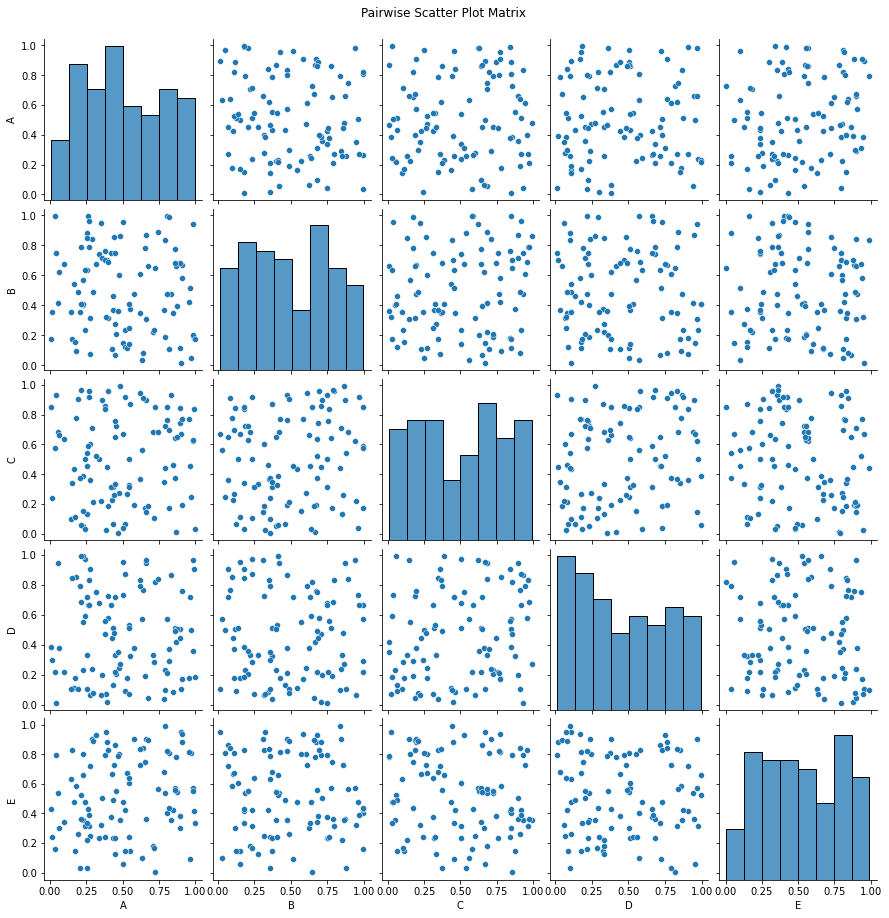

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a large multivariate dataset with 100 rows and 5 columns
df = pd.DataFrame(np.random.rand(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Create a pairplot using seaborn
sns.pairplot(df)

# Customize the labels and title
plt.suptitle("Pairwise Scatter Plot Matrix", y=1.02)  # Title with padding
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()


In [10]:
print("-------end-------")

-------end-------
